In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/clean_data/PCA_dataset_for_clustering.csv', index_col = 0)
data = data.dropna()
data.head()

,principal_component1,principal_component2,principal_component3,poverty_ratio
1,-1.706124,-0.683082,1.572728,BELOW POVERTY LEVEL
2,-1.368367,0.148545,0.576322,BELOW POVERTY LEVEL
3,-1.363368,0.104961,0.617455,150 AND ABOVE THE POVERTY LEVEL
4,-0.947033,0.103809,0.097157,150 AND ABOVE THE POVERTY LEVEL
5,-0.877239,-0.201467,0.130536,150 AND ABOVE THE POVERTY LEVEL


In [4]:
clustering_df = data.copy()
clustering_df = clustering_df.drop(columns='poverty_ratio')
clustering_df.head()

,principal_component1,principal_component2,principal_component3
1,-1.706124,-0.683082,1.572728
2,-1.368367,0.148545,0.576322
3,-1.363368,0.104961,0.617455
4,-0.947033,0.103809,0.097157
5,-0.877239,-0.201467,0.130536


## Kmeans

In [7]:
#import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
Label=data["poverty_ratio"]
Label_map={"150 AND ABOVE THE POVERTY LEVEL":0, 
       "BELOW POVERTY LEVEL":1, 
       "125 - 149 PERCENT OF THE POVERTY LEVEL":2, 
       "100 - 124 PERCENT OF THE POVERTY LEVEL":3
}
remapped_labels = Label.map(Label_map)  

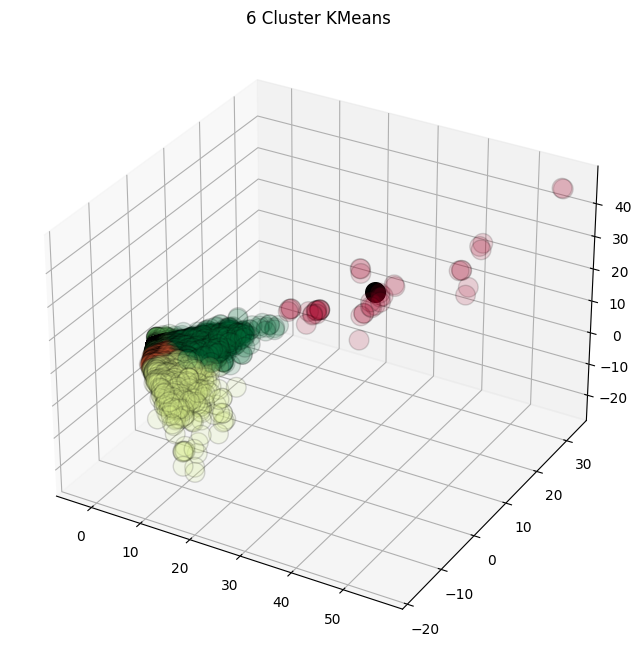

In [9]:
fig3 = plt.figure(figsize=(8,8))
ax1 = fig3.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=6)
kmeans.fit(clustering_df)

x = data.iloc[:,0]
y = data.iloc[:,1]
z = data.iloc[:,2]

x_cluster6 = kmeans.cluster_centers_[:,0]
y_cluster6 = kmeans.cluster_centers_[:,1]
z_cluster6 = kmeans.cluster_centers_[:,2]

ax1.scatter(x,y,z, cmap = "RdYlGn", edgecolor = 'k', s = 200, c= kmeans.labels_, alpha = 0.15)
ax1.scatter(x_cluster6, y_cluster6, z_cluster6, s=200, c='black')
plt.title("6 Cluster KMeans")
plt.savefig('../site_pages/plots/cluster_6.png')

In [51]:
score1 = silhouette_score(clustering_df, kmeans.labels_)
score1

0.3214051600267454

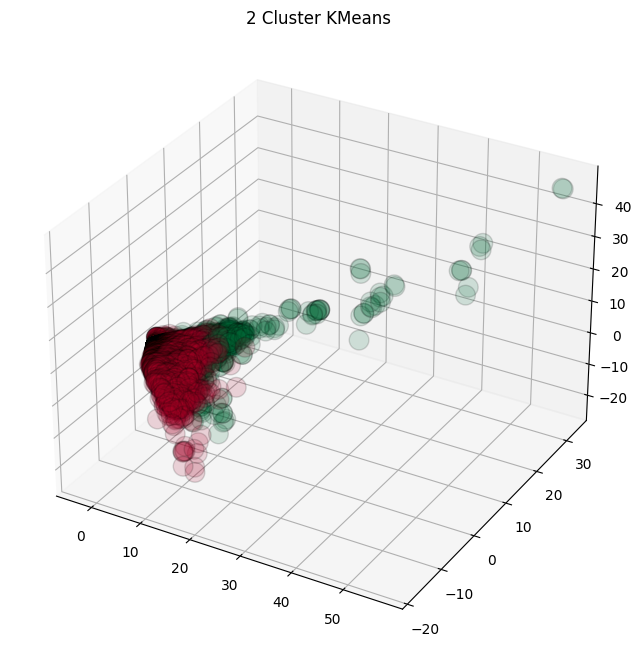

In [102]:
fig3 = plt.figure(figsize=(8,8))
ax1 = fig3.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=2)
kmeans.fit(clustering_df)

x = data.iloc[:,0]
y = data.iloc[:,1]
z = data.iloc[:,2]

x_cluster2 = kmeans.cluster_centers_[:,0]
y_cluster2 = kmeans.cluster_centers_[:,1]
z_cluster2 = kmeans.cluster_centers_[:,2]

ax1.scatter(x,y,z, cmap = "RdYlGn", edgecolor = 'k', s = 200, c= kmeans.labels_, alpha = 0.15)
ax1.scatter(x_cluster2,y_cluster2,z_cluster2, s=200, c='black')
plt.title("2 Cluster KMeans")
plt.savefig('../site_pages/plots/cluster_2.png')

In [53]:
score2 = silhouette_score(clustering_df, kmeans.labels_)
score2

0.3872644769135034

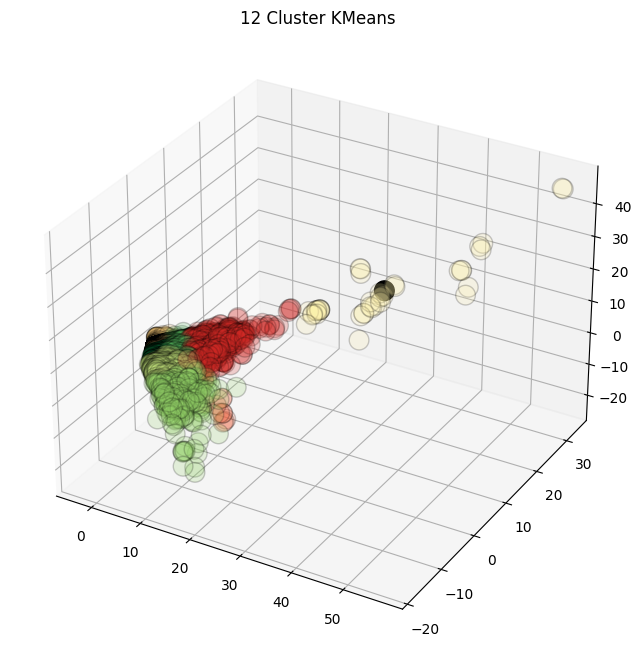

In [101]:
fig3 = plt.figure(figsize=(8,8))
ax1 = fig3.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=12)
kmeans.fit(clustering_df)

x = data.iloc[:,0]
y = data.iloc[:,1]
z = data.iloc[:,2]

x_cluster12 = kmeans.cluster_centers_[:,0]
y_cluster12 = kmeans.cluster_centers_[:,1]
z_cluster12 = kmeans.cluster_centers_[:,2]

ax1.scatter(x,y,z, cmap = "RdYlGn", edgecolor = 'k', s = 200, c= kmeans.labels_, alpha = 0.2)
ax1.scatter(x_cluster12, y_cluster12, z_cluster12, s=200, c='black', alpha = 1)
plt.title("12 Cluster KMeans")
plt.savefig('../site_pages/plots/cluster_12.png')

In [55]:
score3 = silhouette_score(clustering_df, kmeans.labels_)
score3

0.32760782196802746

In [59]:
cluster_label = ['2 Clusters', '6 Clusters', '12 Clusters']
score_data = [score1,score2,score3]
score_df = pd.DataFrame({'Cluster Count' : cluster_label, 'Silhouette Scores':score_data})
score_df

,Cluster Count,Silhouette Scores
0,2 Clusters,0.321405
1,6 Clusters,0.387264
2,12 Clusters,0.327608


In [71]:
cluster2_df = pd.DataFrame({'2 Cluster X Coordinate':x_cluster2, "2 Cluster Y Coordinate":y_cluster2, "2 CLuster Z Coordinate":z_cluster2})
cluster6_df = pd.DataFrame({'6 Cluster X Coordinate':x_cluster6, "6 Cluster Y Coordinate":y_cluster6, "6 Cluster Z Coordinate":z_cluster6})
cluster12_df = pd.DataFrame({'12 Cluster X Coordinate':x_cluster12, "12 CLuster Y Coordinate":y_cluster12, "12 CLuster Z Coordinate":z_cluster12})
print(cluster2_df)
print(cluster6_df)
print(cluster12_df)

   2 Cluster X Coordinate  2 Cluster Y Coordinate  2 CLuster Z Coordinate
0                0.123807                1.064841               -0.588371
1               -0.086266               -0.747484                0.413069
   6 Cluster X Coordinate  6 Cluster Y Coordinate  6 Cluster Z Coordinate
0               -0.363564                1.040277               -0.768590
1               -0.962964               -0.275755                0.910779
2                3.289142               -2.807428               -2.054725
3                2.453070                1.152768                1.044776
4                0.324981               -0.979792               -0.062148
5               31.863514               15.029574               19.177105
    12 Cluster X Coordinate  12 CLuster Y Coordinate  12 CLuster Z Coordinate
0                 -0.724936                 1.043482                -0.803771
1                  0.757479                -1.614351                -0.090507
2                  2.01360

In [72]:
cluster2_df

,2 Cluster X Coordinate,2 Cluster Y Coordinate,2 CLuster Z Coordinate
0,0.123807,1.064841,-0.588371
1,-0.086266,-0.747484,0.413069


In [73]:
cluster6_df

,6 Cluster X Coordinate,6 Cluster Y Coordinate,6 Cluster Z Coordinate
0,-0.363564,1.040277,-0.768590
1,-0.962964,-0.275755,0.910779
2,3.289142,-2.807428,-2.054725
3,2.453070,1.152768,1.044776
4,0.324981,-0.979792,-0.062148
5,31.863514,15.029574,19.177105


In [74]:
cluster12_df


,12 Cluster X Coordinate,12 CLuster Y Coordinate,12 CLuster Z Coordinate
0,-0.724936,1.043482,-0.803771
1,0.757479,-1.614351,-0.090507
2,2.013607,0.689833,1.103491
3,0.685373,1.312301,-0.496028
4,-0.863966,0.229796,0.723783
5,33.270337,15.552971,19.868917
6,2.480305,-3.109665,-0.847203
7,6.519907,2.880585,3.257372
8,2.263098,0.664370,-3.307271
9,7.237232,-6.592722,-4.625584


## Heirarchical Clustering

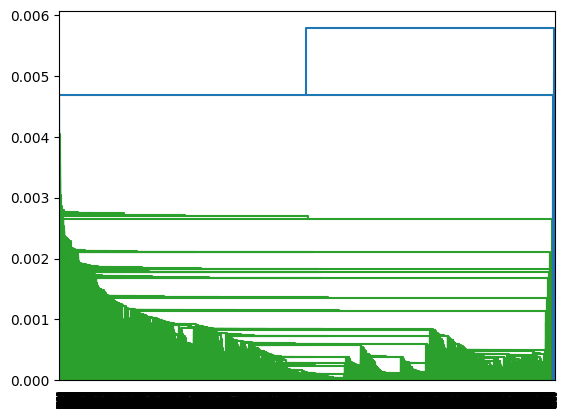

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage

heirarchical_data = list(zip(x,y,z))
data_friendly_clustering = clustering_df.sample(n = 10000)
linkage_data = linkage(data_friendly_clustering, metric='cosine')
dendrogram(linkage_data)

plt.savefig('../site_pages/plots/dendrogram_full.png')

plt.show()

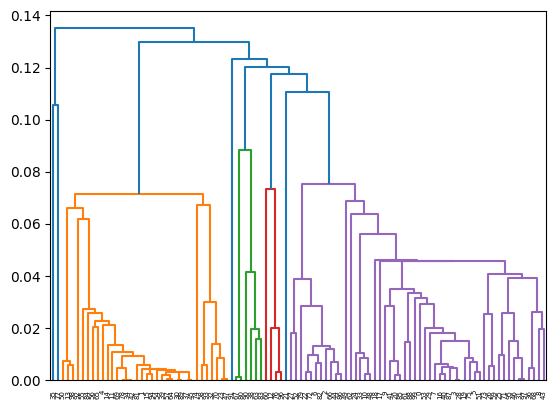

In [91]:
heirarchical_data = list(zip(x,y,z))
data_friendly_clustering = clustering_df.sample(n = 100)
linkage_data = linkage(data_friendly_clustering, metric='cosine')
dendrogram(linkage_data)

plt.savefig('../site_pages/plots/dendrogram_sample.png')

plt.show()

## Density Based Clustering

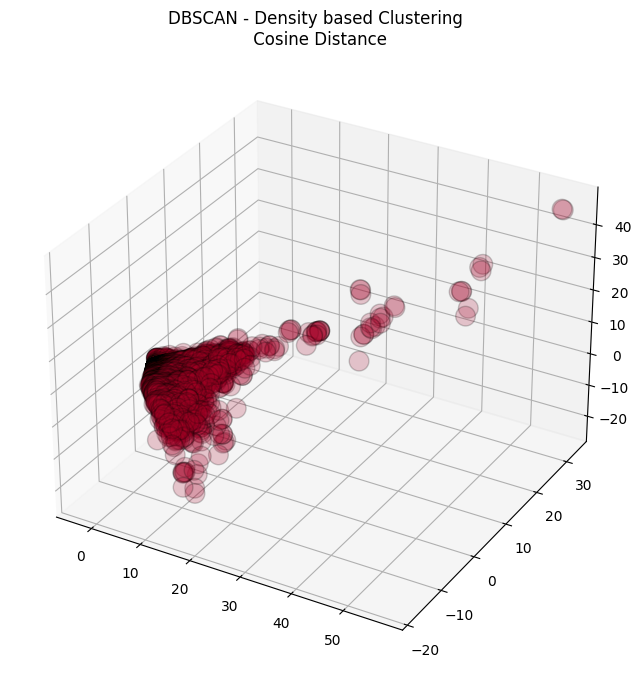

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.0001, min_samples=500, metric = 'cosine').fit(clustering_df)

fig4 = plt.figure(figsize=(8,8))
ax4 = fig4.add_subplot(projection='3d')

ax4.scatter(x,y,z, cmap = "RdYlGn", edgecolor = 'k', s = 200, c= dbscan.labels_, alpha = 0.2)
plt.title("DBSCAN - Density based Clustering \n Cosine Distance")
plt.savefig('../site_pages/plots/dbscan.png')

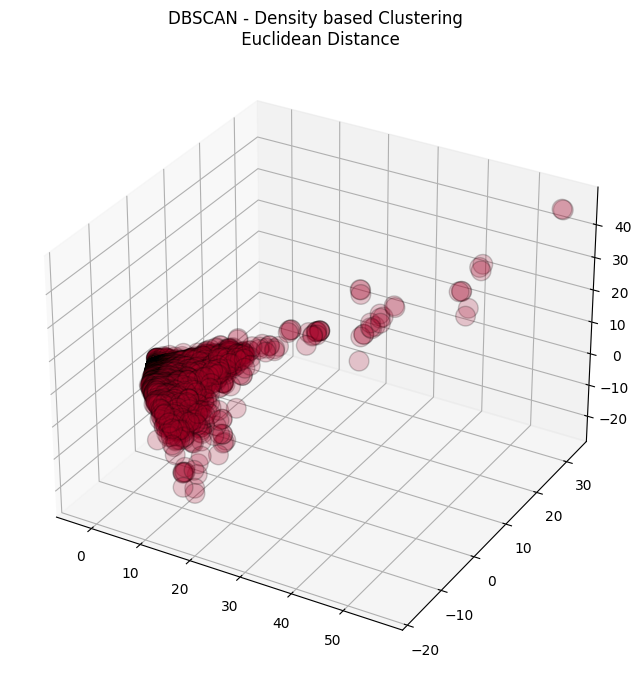

In [12]:
dbscan = DBSCAN(eps = 0.1, min_samples=500).fit(clustering_df)

fig4 = plt.figure(figsize=(8,8))
ax4 = fig4.add_subplot(projection='3d')

ax4.scatter(x,y,z, cmap = "RdYlGn", edgecolor = 'k', s = 200, c= dbscan.labels_, alpha = 0.2)
plt.title("DBSCAN - Density based Clustering \n Euclidean Distance")
plt.savefig('../site_pages/plots/dbscan_euclidean.png')

In [14]:
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


In [13]:
from sklearn.metrics import silhouette_score
score4 = silhouette_score(clustering_df, dbscan.labels_)


In [15]:
score4

-0.20074752082273228